In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
sale=pd.read_csv('Wholesale customers data.csv')

In [5]:
sale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
sale=sale.drop(['Channel','Region'],axis=1)

In [10]:
distortions=[]
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(sale)
    distortions.append(sum(np.min(cdist(sale,kmeanModel.cluster_centers_, 'euclidean'),axis=1))/sale.shape[0])

In [11]:
distortions

[14561.83033839006,
 12338.433138793233,
 10492.875588578885,
 9511.550221577088,
 8515.10567611748,
 8055.990916750738,
 7808.50130713977,
 7463.1952133618615,
 7052.3030017765595]

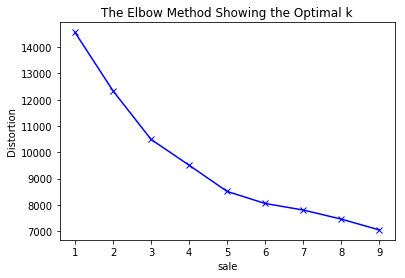

In [12]:
plt.plot(K,distortions,'bx-')
plt.xlabel('sale')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal k')
plt.show()

In [13]:
n_clusters = [8,6,4,3,2]

In [15]:
from sklearn import cluster
from sklearn.metrics import silhouette_score

for n in n_clusters:
    clust = KMeans(n_clusters = n).fit(sale)
    preds = clust.predict(sale)
    centers = clust.cluster_centers_
    score = silhouette_score(sale, preds)
    print("The silhouette_score for {} clusters is {}".format(n, score))

The silhouette_score for 8 clusters is 0.3228515253509095
The silhouette_score for 6 clusters is 0.38144028080098374
The silhouette_score for 4 clusters is 0.3866313700058197
The silhouette_score for 3 clusters is 0.4783511430782059
The silhouette_score for 2 clusters is 0.5115333898779053
